# Medidas de Posição e Tendência Central

**Importando as bibliotecas**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
from scipy.stats.mstats import gmean,hmean
from scipy import stats

**Média Aritmética (MA) - É a soma de todos os elementos do conjunto, divididos pelo número de elementos que compõe o conjunto.**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c938ca170f8c4a5d2dddecabc5ae1d5eb5f35a2b)

In [3]:
dados = [1,2,5,3,4]

In [4]:
np.mean(dados)

3.0

**Média Geométrica (MG) - É a raíz n-ésima do produto de todos os elementos que compõe o conjunto.**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/82fb3d898a5de7ae016b07855c335ce570350410)

In [5]:
gmean(dados)

2.6051710846973517

**Média Harmônica (MH) - É o número de elementos, divididos pela soma dos inversos dos elementos que compõem o conjunto.**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5335415727099e38ba27a1775613020dc4b584de)

In [6]:
hmean(dados)

2.18978102189781

## Analisando as diferenças entre cada uma das médias

### Funções para plotar gráficos

In [7]:
def plot_lines(dados, valor_central):
  if valor_central in dados:
    posicao_central = dados.index(valor_central)+1
  else:
    dados.append(valor_central)
    dados.sort()
    posicao_central = dados.index(valor_central)+1
  
  posicoes = np.arange(1,len(dados)+1,1)
  plt.figure(figsize=(8,6))
  plt.plot(posicoes,dados,'o-', color='red',ms=15)
  plt.plot(posicao_central, valor_central, 'o-',color='blue',ms=15)
  plt.show()

In [8]:
def plot_line_means(dados, mean, gmean,hmean):
  posicoes_centrais=[]
  y=[]
  x = dados
  
  for m in [mean,gmean,hmean]:
    x.append(m)
  
  x.sort()
  for m in [mean,gmean,hmean]:
    if m in x:
      posicoes_centrais.append(x.index(m)+1)
  
  print("Dados: {}".format(x))
  print("Media aritmética: {}, Média Geométrica: {}, Média Harmonica: {}".format(mean,gmean,hmean))
  
  y = np.arange(1,len(x)+1,1)
  
  plt.figure(figsize=(8,6))
  plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b'])))
  plt.plot(y,x,'o-', color='black',ms=15)
  medias = ['MA','MG','MH'] 
  i=0
  for posicao_central,valor_central in zip(posicoes_centrais,[mean,gmean,hmean]):
    plt.plot(posicao_central, valor_central, 'o-',ms=15)
    plt.text(x=posicao_central+0.2, y=valor_central+0.2, s=medias[i], alpha=0.7, color='#334f8d')
    i+=1

  plt.show()

In [9]:
def plot_lines_horizontal(dados,valor_central):
  plt.figure(figsize=(10,6))
  y = 0
  plt.hlines(y, min(dados), max(dados))
  for n in dados:
    if n == valor_central:
      plt.plot(n,y, 'o', ms = 15, color='blue')
      continue  
    plt.plot(n,y, 'o', ms = 15, color = 'red')

### Considere os cenários

Exemplo de dados gerados a partir de uma **operação de adição**. A soma do valor 3 em cada elemento do vetor (relacionamento linear)

In [10]:
dados_linear = [1, 4, 7, 10, 13, 16, 19]

**Calculando a média aritmética**

In [11]:
media = int(np.mean(dados_linear))

In [12]:
print("Valor da média aritmética dos dados: {}".format(media))

Valor da média aritmética dos dados: 10


**Plotando os dados e sua média**

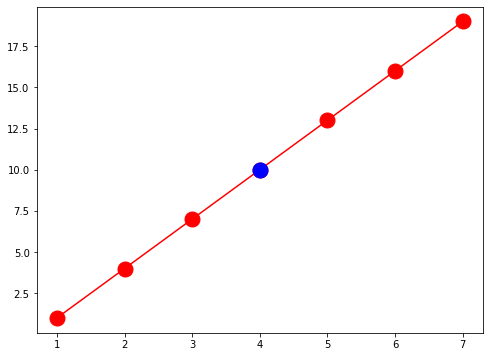

In [13]:
plot_lines(dados_linear,media)

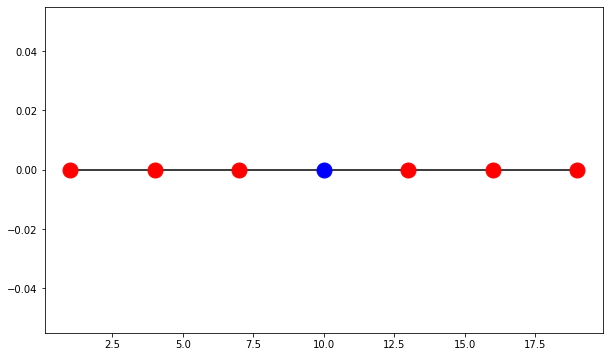

In [14]:
plot_lines_horizontal(dados_linear,media)

Exemplo de dados gerados a partir de uma **operação de multiplicação**. A multiplicação de cada elemento pelo valor de 3 (relacionamento multiplicativo)

In [197]:
dados_multiplicativo = [1, 3, 9, 27, 81, 243, 729]

**Calculando a média aritmética.**

(1 + 3 + 9 + 27 + 81 + 243 + 729) ÷ 7 = **156.1**

In [190]:
media = int(np.mean(dados_multiplicativo))

In [17]:
print("Valor da média aritmética dos dados: {}".format(media))

Valor da média aritmética dos dados: 156


**Plotando os dados e sua média.**

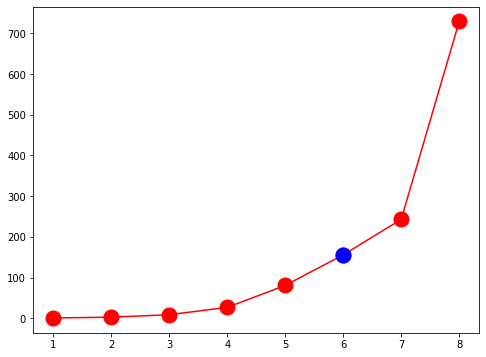

In [191]:
plot_lines(dados_multiplicativo,media)

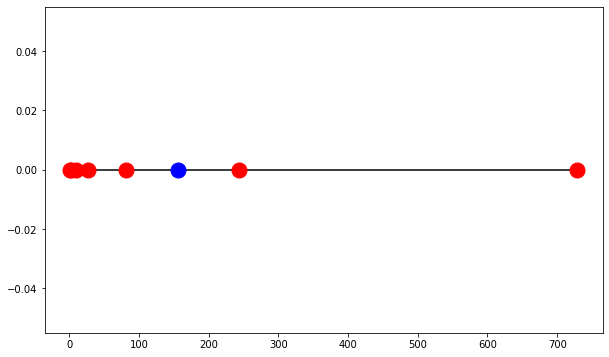

In [192]:
plot_lines_horizontal(dados_multiplicativo,media)

**Considerando agora a aplicação da média geométrica.**

**Especificando os mesmos dados com um relacionando multiplicativo.**

In [193]:
dados_multiplicativo = [1, 3, 9, 27, 81, 243, 729]

**Calculando a média geométrica.**

(1 * 3 * 9 * 27 * 81 * 243 * 729) = 10,460,353,203

Raiz sétima (7) de **10,460,353,203** = 27

In [194]:
media_geo = int(gmean(dados_multiplicativo))

In [22]:
print("Valor da média geométrica dos dados: {}".format(media_geo))

Valor da média geométrica dos dados: 27


**Plotando os dados e sua média.**

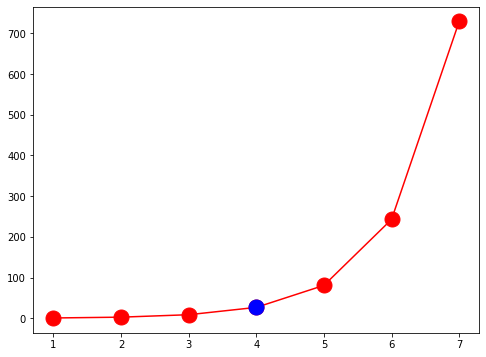

In [195]:
plot_lines(dados_multiplicativo,media_geo)

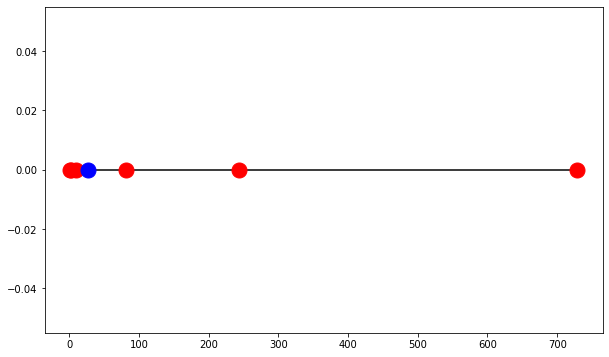

In [196]:
plot_lines_horizontal(dados_multiplicativo,media_geo)

Note que a média aritmética é bastante sensível a valores extremos. Ou seja, se olharmos para nosso exemplo com o conjunto de dados de relação multiplicativa, o valor da média aritmética é muito maior do que o valor da média geométrica para o mesmo conjunto de dados. Nesse caso, portanto, a média geométrica se sai melhor do que a média aritmética.

## Média harmônica.

**Exemplo: Viagem**

Percurso Total da Viagem 10km
*   CAMINHO DE IDA = 30km/h
*   CAMINHO DE VOLTA = 10km/h




**Qual a velocidade média da viagem?**

Usando a média aritmética

In [25]:
np.mean([30,10])

20.0

**VIAGEM DE IDA - 5km à 30km/h**
*   30 km por 60 minutos = 1 km a cada 2 minutos = 1/2 km por minuto.
*   5km a 1/2 km por minuto = 10 minutos.


**VIAGEM DE VOLTA - 5km à 10km/h**
*   10 km por 60 minutos = 1 km a cada 6 minutos = 1/6 km por minuto.
*   5 km a 1/6 km por minuto = 30 minutos.

Tempo total da viagem = 40 minutos

**Proporção da viagem de ida em relação ao tempo total da viagem.**

In [26]:
print("Proporção de tempo da viagem de ida em relação ao tempo total da viagem: {}%".format((10/40)*100))

Proporção de tempo da viagem de ida em relação ao tempo total da viagem: 25.0%


**Proporção da viagem de volta em relação ao tempo total da viagem.**

In [27]:
print("Proporção de tempo da viagem de volta em relação ao tempo total da viagem: {}%".format((30/40)*100))

Proporção de tempo da viagem de volta em relação ao tempo total da viagem: 75.0%


**Calculando a Média Aritmética Ponderada.**

In [28]:
np.average([30,10], weights=[.25,.75])

15.0

**Calculando a Média Harmônica.**

In [29]:
hmean([30,10])

15.0

### As médias seguem um relacionamento ordinal: **média harmônica < média geométrica < média aritmética**.

**Considerando os dados com o relacionamento aditivo.**

In [30]:
dados = [1, 4, 7, 10, 13, 16, 19]

In [31]:
media_aritmetica,media_geometrica,media_harmonica = round(np.mean(dados),2),round(gmean(dados),2),round(hmean(dados),2)

In [32]:
media_aritmetica,media_geometrica,media_harmonica

(10.0, 7.3, 4.15)

**Visualizando graficamente.**

Dados: [1, 4, 4.15, 7, 7.3, 10, 10.0, 13, 16, 19]
Media aritmética: 10.0, Média Geométrica: 7.3, Média Harmonica: 4.15


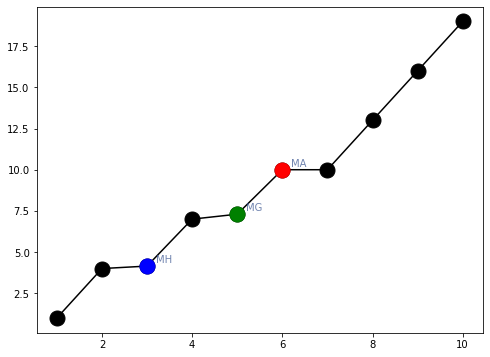

In [33]:
plot_line_means(dados,media_aritmetica,media_geometrica,media_harmonica)

**Considerando os dados com o relacionamento multiplicativo.**

In [34]:
dados = [1, 3, 9, 27, 81, 243, 729]

In [35]:
media_aritmetica,media_geometrica,media_harmonica = round(np.mean(dados),2),round(gmean(dados),2),round(hmean(dados),2)

In [36]:
media_aritmetica,media_geometrica,media_harmonica

(156.14, 27.0, 4.67)

**Visualizando graficamente.**

Dados: [1, 3, 4.67, 9, 27, 27.0, 81, 156.14, 243, 729]
Media aritmética: 156.14, Média Geométrica: 27.0, Média Harmonica: 4.67


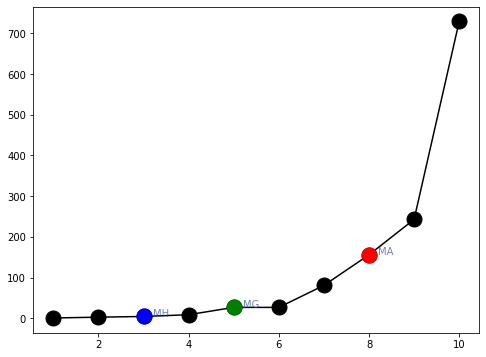

In [37]:
plot_line_means(dados,media_aritmetica,media_geometrica,media_harmonica)

**Moda - Valores mais frequentes da distribuição**

In [38]:
dados=[4,5,4,6,5,8,4]

In [39]:
stats.mode(dados)

ModeResult(mode=array([4]), count=array([3]))

In [40]:
dados_bimodal=[4,5,4,6,5,8,4,4,5,5]

In [41]:
from collections import Counter

In [42]:
def calcula_moda(dados):
  number_counts = Counter(dados)
  print(number_counts)
  modes = [val for val,count in number_counts.items() if count == max(number_counts.values())]
  return modes

In [43]:
calcula_moda(dados_bimodal)

Counter({4: 4, 5: 4, 6: 1, 8: 1})


[4, 5]

In [44]:
dados_amodal=[1,2,3,4,5]

In [45]:
calcula_moda(dados_amodal)

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1})


[1, 2, 3, 4, 5]

**Mediana - É o valor da variável que divide os dados ordenados em duas partes de igual frequência.**

In [46]:
dados_mediana7 = [7,1,5,2,3,1,6]

In [47]:
np.sort(dados_mediana7)

array([1, 1, 2, 3, 5, 6, 7])

In [48]:
np.median(dados_mediana7)

3.0

In [49]:
dados_mediana8 = [1,2,1,1,4,5,3,6]

In [50]:
np.sort(dados_mediana8)

array([1, 1, 1, 2, 3, 4, 5, 6])

In [51]:
np.median(dados_mediana8)

2.5

# Medidas Separatrizes

In [52]:
notas = [13,25,69,72,33,41,28,17,65]

In [53]:
np.sort(notas)

array([13, 17, 25, 28, 33, 41, 65, 69, 72])

**Q1 - Primeiro Quartil**

In [54]:
np.quantile(notas,.25)

25.0

**Q2 - Segundo Quartil**

In [55]:
np.quantile(notas,.50)

33.0

Comparando com o valor da Mediana

In [56]:
np.median(notas)

33.0

**Q3 - Terceiro Quartil**

In [57]:
np.quantile(notas,.75)

65.0

**P25 - Percentil 25 = Q1**

In [58]:
np.percentile(notas,25)

25.0

**P50 - Percentil 50 = Q2**


In [59]:
np.percentile(notas,50)

33.0

**P75 - Percentil 75 = Q3**

In [60]:
np.percentile(notas,75)

65.0

## Medidas de Variação e Dispersão

In [61]:
dados_dispersao = [10,20,30,40,50,60,70,80,90,100]

**Média**

In [62]:
np.mean(dados_dispersao)

55.0

**Variância**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c2446a06b779245a22147449fc523f2b1b0013ef)

In [63]:
np.var(dados_dispersao)

825.0

**Desvio Padrão**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/cc45b72e1fd6a3de3ec4977f42367f104f57583f)

In [64]:
np.std(dados_dispersao)

28.722813232690143

**Coeficiente de Variação**

In [65]:
stats.variation(dados_dispersao)

0.5222329678670935

Importante: Um coeficiente de variação **menor que 25%** é um bom indicativo de homogeneidade dos dados, ou seja, os dados não variam tanto a partir da média.

In [66]:
media=np.mean(dados_dispersao)
desvio_padrao = np.std(dados_dispersao)

In [67]:
desvio_padrao/media

0.5222329678670935

# Exemplo usando o Pandas

**Importando as bibliotecas.**

In [68]:
import pandas as pd               
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Carregando a base de dados.**

In [70]:
df = pd.read_csv("cars.csv")

**Verificando os dados.**

In [71]:
df.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


**Verificando as informações do conjunto de dados.**

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


**Limpando os dados do atributo MSRP.**

In [73]:
df['MSRP'] = [x.replace('$', '') for x in df['MSRP']] 
df['MSRP'] = [x.replace(',', '') for x in df['MSRP']]

**Verificando os dados após limpeza.**

In [74]:
df['MSRP'].head(5)

0    36945
1    23820
2    26990
3    33195
4    43755
Name: MSRP, dtype: object

**Verificando as informações do conjunto de dados.**

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


**Transformando os dados para o formato numérico.**

In [76]:
df['MSRP']=pd.to_numeric(df['MSRP'],errors='coerce')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 50.3+ KB


In [78]:
df.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


**Calculando a média aritmética.**

In [79]:
df["MSRP"].mean()

32774.85514018692

In [80]:
msrp = df["MSRP"]

In [81]:
msrp.mean()

32774.85514018692

**Calculando a média geométrica.**

In [82]:
gmean(msrp)

28841.635198804073

**Calculando a média harmônica.**

In [83]:
hmean(msrp)

25837.78463669279

**Calculando a mediana.**

In [84]:
msrp.median()

27635.0

**Calculando a moda.**

In [85]:
msrp.mode()

0     13270
1     15389
2     19635
3     19860
4     21055
5     21595
6     23495
7     23895
8     25700
9     27490
10    28495
11    29995
12    31545
13    33995
14    34495
15    35940
16    49995
17    74995
dtype: int64

Note que o atributo MSRP do conjunto de dados é multimodal

**Calculando a variância.**

In [86]:
msrp.var()

377591612.88763136

**Calculando o desvio padrão.**

In [87]:
msrp.std()

19431.716673717518

**Valor máximo.**

In [88]:
msrp.max()

192465

**Valor mínimo.**

In [89]:
msrp.min()

10280

# Medidas de Assimetria
Nos possibilitam analisar uma distribuição em relação a sua moda, mediana e média.

In [90]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import kurtosis, skew
%matplotlib inline

**Função para calcular estatísticas.**

In [105]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Curtose: {}".format(mean,mode,median,var,std,coef_pearson,coef_kurtosis))
  return msg

**Considere a seguinte amostra.**

In [106]:
s0 = [4,5,6,5,5,6,6,5,4,5,5,5]

In [107]:
calcula_estatisticas(s0)

Media: 5.08
Moda: 5
Mediana: 5.0
Variância: 0.41
Desvio Padrão: 0.64
Coeficiente Person: -0.08
Coeficiente de Curtose: -0.58


Distribuição Simétrica -> Média = Moda = Mediana.

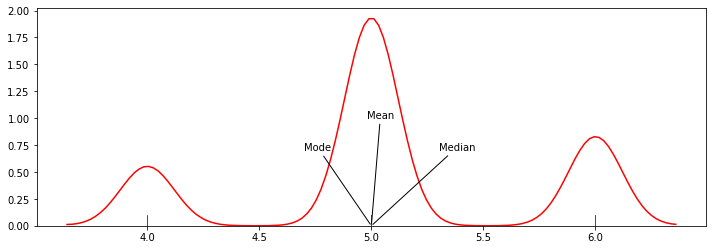

In [153]:
fig = plt.figure(figsize=(12, 4))
ax = sns.distplot(s0,rug=True,kde=True,hist=False)

ax.annotate('Mode', xy=(round(stats.mode(s0)[0][0],0), 0), xytext=(round(stats.mode(s0)[0][0],2) - 0.3, 0.7),arrowprops={'arrowstyle': '-'})         
ax.annotate('Median', xy=(round(np.median(s0),0), 0), xytext=(round(np.median(s0),2) + 0.3, 0.7),arrowprops={'arrowstyle': '-'})
ax.annotate('Mean', xy=(round(np.mean(s0),0), 0), xytext=(round(np.mean(s0),2) - 0.1, 1), arrowprops={'arrowstyle': '-'})
plt.show()

Coeficiente de Pearson - O valor é próximo de zero, logo a distribuição é simétrica.

**Considere a segunda amostra.**

In [112]:
s1 = [12,8.0, 4, 3, 2,1,1]

In [113]:
calcula_estatisticas(s1)

Media: 4.43
Moda: 1.0
Mediana: 3.0
Variância: 14.53
Desvio Padrão: 3.81
Coeficiente Person: 0.98
Coeficiente de Curtose: -0.45


Assimétrica positiva / à direita -> Média > Mediana > Moda

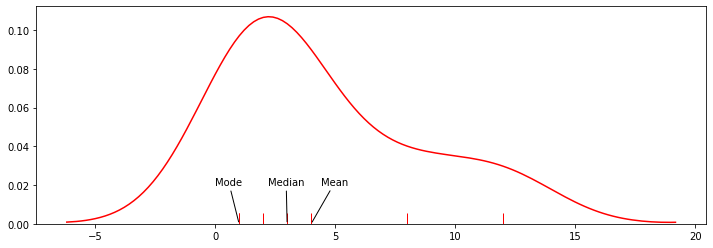

In [150]:
fig = plt.figure(figsize=(12, 4))
ax = sns.distplot(s1,rug=True,kde=True,hist=False)

ax.annotate('Mode', xy=(round(stats.mode(s1)[0][0],0), 0), xytext=(round(stats.mode(s1)[0][0],2) -1, 0.02),arrowprops={'arrowstyle': '-'})         
ax.annotate('Median', xy=(round(np.median(s1),0), 0), xytext=(round(np.median(s1),2) - 0.8, 0.02),arrowprops={'arrowstyle': '-'})
ax.annotate('Mean', xy=(round(np.mean(s1),0), 0), xytext=(round(np.mean(s1),2), 0.02), arrowprops={'arrowstyle': '-'})
plt.show()

Coeficiente de Pearson - O valor é próximo de 1, ou seja, maior que 0, logo a distribuição é assimétrica positiva

**Considere a terceira amostra**

In [137]:
s2 = [-3,-1,4,2.5,4,3]

In [138]:
calcula_estatisticas(s2)

Media: 1.58
Moda: 4.0
Mediana: 2.75
Variância: 7.03
Desvio Padrão: 2.65
Coeficiente Person: -0.73
Coeficiente de Curtose: -1.12


Assimétrica negativa / à esquerda -> Média < Mediana < Moda

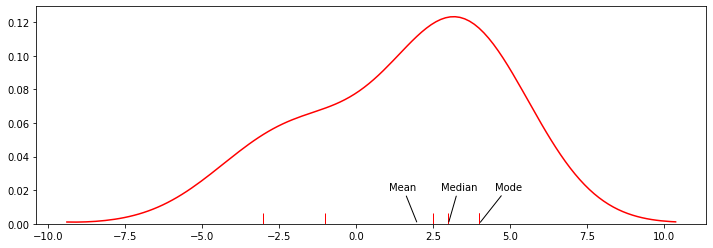

In [149]:
fig = plt.figure(figsize=(12, 4))
ax = sns.distplot(s2,rug=True,kde=True,hist=False)

ax.annotate('Mode', xy=(round(stats.mode(s2)[0][0],0), 0), xytext=(round(stats.mode(s2)[0][0],2) + 0.5, 0.02),arrowprops={'arrowstyle': '-'})         
ax.annotate('Median', xy=(round(np.median(s2),0), 0), xytext=(round(np.median(s2),2), 0.02),arrowprops={'arrowstyle': '-'})
ax.annotate('Mean', xy=(round(np.mean(s2),0), 0), xytext=(round(np.mean(s2),2) - 0.5, 0.02), arrowprops={'arrowstyle': '-'})
plt.show()

Coeficiente de Pearson - O valor é próximo de -1, ou seja, menor que 0, logo a distribuição é assimétrica negativa.

## Verificando graficamente as distribuições dos atributos do Dataframe

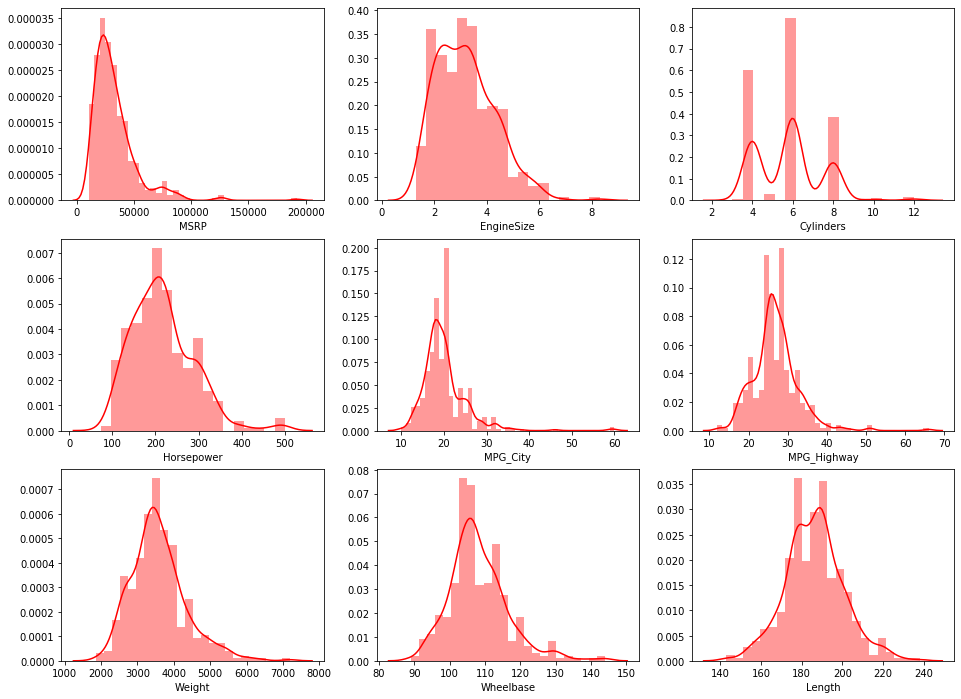

In [164]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(16, 12))
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    sns.distplot(df[column],ax=axes[i//3,i%3])

In [185]:
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    mean = round(df[column].mean(),2)
    std = df[column].std()
    cvar = round((std/mean)*100,2)
    median = df[column].median()
    print("Atributo: {}, Coeficiente de Variação: {} %, Desvio Padrão: {}, Média: {}, Mediana: {}".format(column,cvar, std,mean,median))

Atributo: MSRP, Coeficiente de Variação: 59.29 %, Desvio Padrão: 19431.716673717518, Média: 32774.86, Mediana: 27635.0
Atributo: EngineSize, Coeficiente de Variação: 34.64 %, Desvio Padrão: 1.1085947183514753, Média: 3.2, Mediana: 3.0
Atributo: Cylinders, Coeficiente de Variação: 26.82 %, Desvio Padrão: 1.5584426332202217, Média: 5.81, Mediana: 6.0
Atributo: Horsepower, Coeficiente de Variação: 33.27 %, Desvio Padrão: 71.83603158369077, Média: 215.89, Mediana: 210.0
Atributo: MPG_City, Coeficiente de Variação: 26.11 %, Desvio Padrão: 5.238217638649044, Média: 20.06, Mediana: 19.0
Atributo: MPG_Highway, Coeficiente de Variação: 21.39 %, Desvio Padrão: 5.741200716984228, Média: 26.84, Mediana: 26.0
Atributo: Weight, Coeficiente de Variação: 21.21 %, Desvio Padrão: 758.9832146098709, Média: 3577.95, Mediana: 3474.5
Atributo: Wheelbase, Coeficiente de Variação: 7.69 %, Desvio Padrão: 8.31181299108951, Média: 108.15, Mediana: 107.0
Atributo: Length, Coeficiente de Variação: 7.7 %, Desvio Pa